# <span style="color:CadetBlue">Project: Investigating Missed Medical Appointments</span>
Author: Lauren Bjostad
## <span style="color:CadetBlue"> Table of Contents</span>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
##  <span style="color:CadetBlue"> Introduction</span>


> <span style="color:grey">This report explores a dataset containing 110527 records of medical appointments in Brazil, focusing on if the patient attended. This report will be looking to answer two questions, whether one gender is more likely to miss an appointment than the other, and which day of the week is someone mostly likely to miss their appointment.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_nsa = pd.read_csv(r'~/Library/CloudStorage/OneDrive-WesternGovernorsUniversity/noshowappointments.csv')
#df_nsa = pd.read_csv(r'C:\Users\Lauren\OneDrive - Western Governors University\noshowappointments.csv')
df_nsa.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> <span style="color:grey">Now that the data is accessible, we will want to view how many records we have and the number of columns. For our dataset, we have 14 columns with 110,527 rows. </span>

In [2]:
df_nsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<a id='wrangling'></a>
## <span style="color:CadetBlue">Data Wrangling </span>


### <span style="color:grey">General Properties </span>

> <span style="color:grey"> As this is such a large dataset, we will narrow down the results so we are only working with the parts of the data to answer our two questions. We will make a new data frame for the PatientId, Gender, ScheduledDay, AppointmentDay, SMS_Received, and No-Show columns.</span>

In [3]:
df_nsa_filtered = df_nsa.filter(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'SMS_received', 'No-show'])
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No
...,...,...,...,...,...,...
110522,2.572134e+12,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,1,No
110523,3.596266e+12,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,1,No
110524,1.557663e+13,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,1,No
110525,9.213493e+13,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,1,No


> <span style="color:grey">Now that we have our new, smaller data frame, we will need to check the quality of the data it contains. We are looking to ensure that we are not missing any values, checking the data types for each record and ensuring all of the columns share the same naming convention. </span>

In [4]:
df_nsa_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   SMS_received    110527 non-null  int64  
 5   No-show         110527 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB








### <span style="color:grey">Data Cleaning</span>

> <span style="color:grey">After reviewing the list above, we will want to change the data types of the PatientID, ScheduledDay, and AppointmentDay columns and update the naming convention of the columns for SMS_Received and No-Show to match the rest data. This data set did not contain any missing values. </span>

####  <span style="color:grey">  Data Type Conversion</span>

> <span style="color:grey"> Currently, the data type for PatientID is a <em>Float</em>, meaning a number with a decimal. This data type allows for mathematical calculations to be conducted against that data. Since PatientID is qualitative(descriptive) information, it would contain no meaningful information if it were to be included in a mathematical or statistical analysis. A more appropriate data type for this record is a <em>String</em>. This data type will treat this piece of information like it is a word instead of a number.</span>

In [5]:
df_nsa_filtered['PatientId'] = (df_nsa_filtered['PatientId'].astype(str)).str[:-2]
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No
...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,1,No
110523,3596266328735,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,1,No
110524,15576631729893,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,1,No
110525,92134931435557,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,1,No


> <span style="color:grey">Shortly, we will create new columns based on the numerical difference between when an appointment was scheduled and the scheduled date. ScheduledDay and AppointmentDay are listed as Strings, which we cannot use in a calculation. Before changing these columns to Date fields, we will first want to shorten the string to remove the time information. We are removing the time information because we only have that data for when the booking date and not the appointment date. Once this extra data is removed, we will convert the fields to the appropriate data types. </span>

In [6]:
df_nsa_filtered['ScheduledDay'] = pd.to_datetime(df_nsa_filtered['ScheduledDay'].str[:10], format= '%Y/%m/%d')
df_nsa_filtered['AppointmentDay'] = pd.to_datetime(df_nsa_filtered['AppointmentDay'].str[:10], format= '%Y/%m/%d')
df_nsa_filtered['DayId'] = df_nsa_filtered['AppointmentDay'].dt.weekday
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SMS_received,No-show,DayId
0,29872499824296,F,2016-04-29,2016-04-29,0,No,4
1,558997776694438,M,2016-04-29,2016-04-29,0,No,4
2,4262962299951,F,2016-04-29,2016-04-29,0,No,4
3,867951213174,F,2016-04-29,2016-04-29,0,No,4
4,8841186448183,F,2016-04-29,2016-04-29,0,No,4
...,...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03,2016-06-07,1,No,1
110523,3596266328735,F,2016-05-03,2016-06-07,1,No,1
110524,15576631729893,F,2016-04-27,2016-06-07,1,No,1
110525,92134931435557,F,2016-04-27,2016-06-07,1,No,1


***

In [7]:
df_nsa_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   SMS_received    110527 non-null  int64         
 5   No-show         110527 non-null  object        
 6   DayId           110527 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 5.9+ MB


> <span style="color:grey"> As shown above, we can see that all three fields have been updated to their correct data types.</span>

####  <span style="color:grey">Naming Convention Update </span>

> <span style="color:grey">For readiblity purposes, we will want to update columns SMS_received and No-show to remove all special characters and just be letters. </span>

In [8]:
df_nsa_filtered.rename(columns={'SMS_received': 'SmsReceived','No-show': 'NoShow'}, inplace=True )
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SmsReceived,NoShow,DayId
0,29872499824296,F,2016-04-29,2016-04-29,0,No,4
1,558997776694438,M,2016-04-29,2016-04-29,0,No,4
2,4262962299951,F,2016-04-29,2016-04-29,0,No,4
3,867951213174,F,2016-04-29,2016-04-29,0,No,4
4,8841186448183,F,2016-04-29,2016-04-29,0,No,4
...,...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03,2016-06-07,1,No,1
110523,3596266328735,F,2016-05-03,2016-06-07,1,No,1
110524,15576631729893,F,2016-04-27,2016-06-07,1,No,1
110525,92134931435557,F,2016-04-27,2016-06-07,1,No,1


---
> <span style="color:grey">  Now that the column names have been updated, I want to update the NoShow column to make the data easier to understande.  We will update "No" to say "Attended" and "Yes" to say "Missed".  This will allow for better clarity during the analysis stage.</span>

In [9]:
df_nsa_filtered = df_nsa_filtered.replace({'NoShow': {'No': 'Attended', 'Yes': 'Missed'}})
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SmsReceived,NoShow,DayId
0,29872499824296,F,2016-04-29,2016-04-29,0,Attended,4
1,558997776694438,M,2016-04-29,2016-04-29,0,Attended,4
2,4262962299951,F,2016-04-29,2016-04-29,0,Attended,4
3,867951213174,F,2016-04-29,2016-04-29,0,Attended,4
4,8841186448183,F,2016-04-29,2016-04-29,0,Attended,4
...,...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03,2016-06-07,1,Attended,1
110523,3596266328735,F,2016-05-03,2016-06-07,1,Attended,1
110524,15576631729893,F,2016-04-27,2016-06-07,1,Attended,1
110525,92134931435557,F,2016-04-27,2016-06-07,1,Attended,1


---

#### <span style="color:grey">New Column Creation </span>

> <span style="color:grey"> Now that the data types for each column are assigned appropriately, we can make two new calculated columns based on date information. </span>
***
> <span style="color:grey"> First, we will calculate the days a patient had to wait for their appointment after it was scheduled.</span>

In [10]:
df_nsa_filtered['DaysWaiting'] = np.round(((df_nsa_filtered['AppointmentDay'] - df_nsa_filtered['ScheduledDay']) / np.timedelta64(1, 'D')).astype(int))
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SmsReceived,NoShow,DayId,DaysWaiting
0,29872499824296,F,2016-04-29,2016-04-29,0,Attended,4,0
1,558997776694438,M,2016-04-29,2016-04-29,0,Attended,4,0
2,4262962299951,F,2016-04-29,2016-04-29,0,Attended,4,0
3,867951213174,F,2016-04-29,2016-04-29,0,Attended,4,0
4,8841186448183,F,2016-04-29,2016-04-29,0,Attended,4,0
...,...,...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03,2016-06-07,1,Attended,1,35
110523,3596266328735,F,2016-05-03,2016-06-07,1,Attended,1,35
110524,15576631729893,F,2016-04-27,2016-06-07,1,Attended,1,41
110525,92134931435557,F,2016-04-27,2016-06-07,1,Attended,1,41


> <span style="color:grey"> Second, we will create a column for the day of the week the appointment was scheduled.</span>

In [11]:
df_nsa_filtered['Weekday'] = df_nsa_filtered['AppointmentDay'].dt.day_name()
df_nsa_filtered

,PatientId,Gender,ScheduledDay,AppointmentDay,SmsReceived,NoShow,DayId,DaysWaiting,Weekday
0,29872499824296,F,2016-04-29,2016-04-29,0,Attended,4,0,Friday
1,558997776694438,M,2016-04-29,2016-04-29,0,Attended,4,0,Friday
2,4262962299951,F,2016-04-29,2016-04-29,0,Attended,4,0,Friday
3,867951213174,F,2016-04-29,2016-04-29,0,Attended,4,0,Friday
4,8841186448183,F,2016-04-29,2016-04-29,0,Attended,4,0,Friday
...,...,...,...,...,...,...,...,...,...
110522,2572134369293,F,2016-05-03,2016-06-07,1,Attended,1,35,Tuesday
110523,3596266328735,F,2016-05-03,2016-06-07,1,Attended,1,35,Tuesday
110524,15576631729893,F,2016-04-27,2016-06-07,1,Attended,1,41,Tuesday
110525,92134931435557,F,2016-04-27,2016-06-07,1,Attended,1,41,Tuesday


> <span style="color:grey"> Now that the data is clean and our new columns have been created, we are ready to use this as the basis for our analysis.</span>

<a id='eda'></a>
## <span style="color:CadetBlue">  Exploratory Data Analysis<span>



### <span style="color:DarkCyan">Questions 1: Are Men or Women more likely to attend their scheduled appointment? </span>

> <span style="color:grey"> We are asking this question to see if there is an observable difference between the genders when it comes to appointment attendance.  If there is a significant difference, this could allow us to do further analysis on what might be causing the imbalance.  </span>
</br>
</br>
> <span style="color:grey"> This report will not be evaluating the Age of either gender.</span>

#### <span style="color:grey">Creating new data frames for Gender, Weekday, DaysWaiting and attendance </span>

> <span style="color:grey"> To begin our analysis for this question, we will be creating a new dataframe with the relevant fields. This will include Gender, Weekday, DaysWaiting, and NoShow. </span>

In [12]:
df_nsa_gender = df_nsa_filtered.filter(['Gender', 'Weekday','DaysWaiting', 'NoShow'])
df_nsa_gender.head()

,Gender,Weekday,DaysWaiting,NoShow
0,F,Friday,0,Attended
1,M,Friday,0,Attended
2,F,Friday,0,Attended
3,F,Friday,0,Attended
4,F,Friday,0,Attended


####  <span style="color:grey">Separating the male and female data </span>

> <span style="color:grey"> We will now separate the Male and Female data so it can be used for separate analyses.  To account for a possible errors in data, we will also be filtering each group to make sure only records with a postive value in the <em>DaysWaiting</em> column will be included. </span>

In [13]:
df_nsa_female = df_nsa_gender.loc[(df_nsa_gender['Gender'] == 'F') & (df_nsa_gender['DaysWaiting'] >= 0)]
df_nsa_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       71837 non-null  object
 1   Weekday      71837 non-null  object
 2   DaysWaiting  71837 non-null  int64 
 3   NoShow       71837 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [14]:
df_nsa_male = df_nsa_gender.loc[(df_nsa_gender['Gender'] == 'M') & (df_nsa_gender['DaysWaiting'] >= 0)]
df_nsa_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38685 entries, 1 to 110515
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       38685 non-null  object
 1   Weekday      38685 non-null  object
 2   DaysWaiting  38685 non-null  int64 
 3   NoShow       38685 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


> <span style="color:grey">After reviewing the lists above, we can observe that there are almost double the amount of female records than male records so we will be comparing the percent to whole numbers within each of the groups.</span>

#### <span style="color:grey">Calculating the percent to whole of each group </span>

> <span style="color:grey"> We now need to create the percent to whole calculation for each group that will be used to create a visualization.</span>

In [15]:
s_nsa_male = df_nsa_male.groupby(['Gender','NoShow'])['Gender'].count().transform(lambda x: x/x.sum()).mul(100).round(2)
df_nsa_male_apt = (pd.DataFrame(s_nsa_male)).rename(columns={'Gender': 'Percent'})
df_nsa_male_apt

Percent
Gender NoShow           
M      Attended    80.04
       Missed      19.96

In [16]:
s_nsa_female = df_nsa_female.groupby(['Gender','NoShow'])['Gender'].count().transform(lambda x: x/x.sum()).mul(100).round(2)
df_nsa_female_apt = (pd.DataFrame(s_nsa_female)).rename(columns={'Gender': 'Percent'})
df_nsa_female_apt

Percent
Gender NoShow           
F      Attended    79.69
       Missed      20.31

#### <span style="color:grey"> Charting attendance percentages for Men and Women </span>

> <span style="color:grey"> We will be using a simple Pie chart to visualize this data as it is the best option to view percent to whole statistics</span>


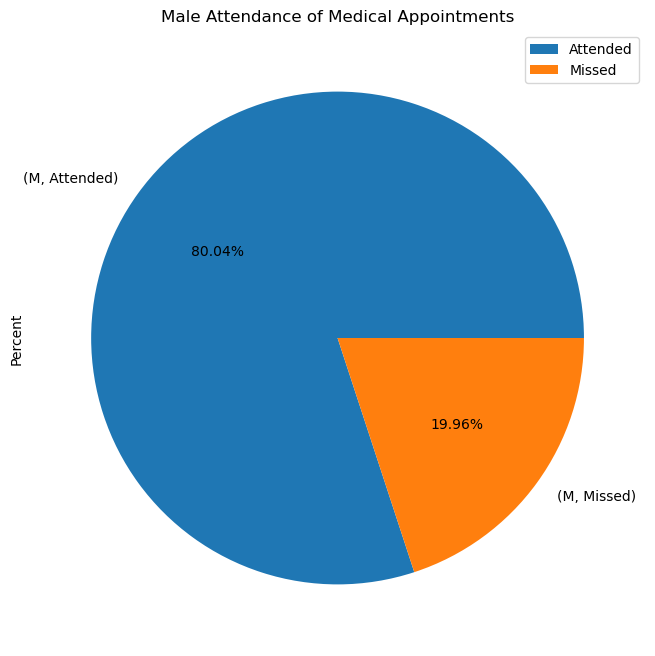

In [17]:
df_nsa_male_apt.plot.pie(subplots=True,autopct='%1.2f%%',figsize=(8,8))
plt.title("Male Attendance of Medical Appointments")
plt.legend(['Attended', 'Missed'], loc='upper right')
plt.show(block = False)

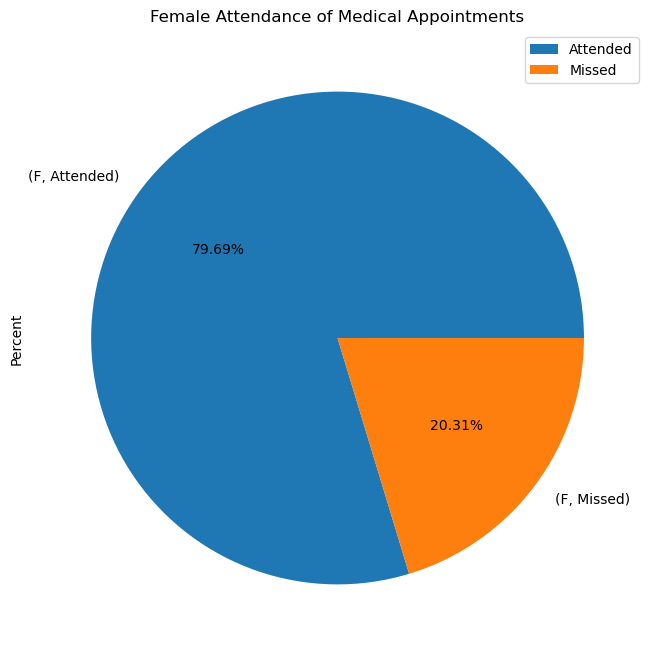

In [18]:
df_nsa_female_apt.plot.pie(subplots=True, autopct='%1.2f%%',figsize=(8,8))
plt.block = False
plt.title("Female Attendance of Medical Appointments")
plt.legend(['Attended', 'Missed'], loc='upper right')
plt.show(block = False)


#### <span style="color:grey">Upon viewing the charts, we can see that the attendance rate among Men and Women are virtually identical. As the variance between the genders is so low, gender does not appear to be a contributing factor on predicting if someone is more likely to miss an appointment</span> 
</br>
</br>
</br>


***

### <span style="color:DarkCyan">Questions 2:  Which day of the week is a scheduled appointment most likely to be missed? </span>

> <span style="color:grey"> The answer to question will could give us insight on whether the day of the week is a factor as to whether a person is more likely to miss a scheduled appointment</span>

#### <span style="color:grey">New Data Frames for day of the week analysis</span>

> <span style="color:grey"> For this question we will be creating a new dataframe to look at the DayId, Weekday, DaysWaiting, and NoShow fields. We are using the DayId field for sorting purposes only. </span>
***


> <span style="color:grey"> This data frame will hold the values for both missed and attended appointments. </span>

In [19]:
df_nsa_total = df_nsa_filtered.loc[(df_nsa_filtered['DaysWaiting'] >= 0)].sort_values(by='DayId')
df_nsa_total = df_nsa_total[['DayId','Weekday', 'NoShow']]
df_nsa_total

,DayId,Weekday,NoShow
69973,0,Monday,Missed
77874,0,Monday,Attended
77873,0,Monday,Attended
69805,0,Monday,Missed
56997,0,Monday,Attended
...,...,...,...
72319,5,Saturday,Attended
72318,5,Saturday,Attended
72317,5,Saturday,Attended
72324,5,Saturday,Attended


> <span style="color:grey"> This data frame will hold the values for missed appointments. </span>

In [20]:
df_nsa_missed = df_nsa_filtered.loc[(df_nsa_filtered['NoShow'] == 'Missed') & (df_nsa_filtered['DaysWaiting'] >= 0)].sort_values(by='DayId')
df_nsa_missed = df_nsa_missed[['DayId','DaysWaiting', 'Weekday']]
df_nsa_missed 

,DayId,DaysWaiting,Weekday
30435,0,10,Monday
82472,0,31,Monday
82473,0,45,Monday
82477,0,45,Monday
82480,0,31,Monday
...,...,...,...
72315,5,11,Saturday
72314,5,12,Saturday
72311,5,1,Saturday
72309,5,3,Saturday


> <span style="color:grey"> This data frame will hold the values for attended appointments. </span>

In [21]:
df_nsa_attended = df_nsa_filtered.loc[(df_nsa_filtered['NoShow'] == 'Attended') & (df_nsa_filtered['DaysWaiting'] >= 0)].sort_values(by='DayId')
df_nsa_attended = df_nsa_attended[['DayId','DaysWaiting', 'Weekday']]
df_nsa_attended 

,DayId,DaysWaiting,Weekday
62794,0,0,Monday
45414,0,0,Monday
45420,0,7,Monday
45421,0,6,Monday
45422,0,14,Monday
...,...,...,...
72328,5,2,Saturday
72330,5,0,Saturday
72332,5,0,Saturday
72303,5,12,Saturday


> <span style="color:grey"> </span>

#### <span style="color:grey">Calculating the percent to total for the number of appointments per calendar day</span> 

> <span style="color:grey"> Now that we have separated the Missed and Attended data, we will be creating a new data frame so we can see both together, but in separate columns. We are also calculating the total for each day and the percent of appointments missed by day. </span>


In [22]:
s_day_attended_count = df_nsa_attended.groupby(['DayId','Weekday'])['Weekday'].count()
s_day_missed_count = df_nsa_missed.groupby(['DayId','Weekday'])['Weekday'].count()
df_day_total = (pd.DataFrame(s_day_attended_count)).rename(columns={'Weekday': 'AttendedTotal'}).reset_index()
df_day_missed_count  = (pd.DataFrame(s_day_missed_count)).rename(columns={'Weekday': 'MissedTotal'}).reset_index()
df_day_total['MissedTotal'] = df_day_missed_count['MissedTotal']
df_day_total['Total'] = df_day_total['MissedTotal'] + df_day_total['AttendedTotal']
df_day_total['MissedPercent'] = df_day_total['MissedTotal'].div(df_day_total['Total']).round(3)*100
df_day_total

,DayId,Weekday,AttendedTotal,MissedTotal,Total,MissedPercent
0,0,Monday,18025,4689,22714,20.6
1,1,Tuesday,20488,5150,25638,20.1
2,2,Wednesday,20774,5092,25866,19.7
3,3,Thursday,13909,3337,17246,19.3
4,4,Friday,14982,4037,19019,21.2
5,5,Saturday,30,9,39,23.1


> <span style="color:grey">Reviewing the data above, by numbers, the most appointments missed by day happen on Tuesdays and Wednesdays but by percent to the total appointments booked on a specific day, Saturday and Fridays show a higher missed percentage. </span>
***
> <span style="color:grey"> The below is looking at the distribution of appointments across the day of the week.  </span>

In [23]:
df_day_total_sorted = df_nsa_total.sort_values('Weekday')
df_day_total_weekday = df_day_total_sorted.groupby(['Weekday','NoShow'])['Weekday'].count()
s_day_total_combined = df_day_total_sorted.groupby(['Weekday',])['NoShow'].count().transform(lambda x: x/x.sum()).mul(100).round(2).reindex(["Monday", "Tuesday", "Wednesday", 'Thursday', 'Friday', 'Saturday'])
df_day_total_combined = (pd.DataFrame(s_day_total_combined)).rename(columns={'NoShow': 'Percent'})
df_day_total_combined

,Percent
Weekday,
Monday,20.55
Tuesday,23.20
Wednesday,23.40
Thursday,15.60
Friday,17.21
Saturday,0.04


In [24]:
df_day_missed_sorted = df_nsa_missed.sort_values('Weekday')
df_day_missed_weekday = df_day_missed_sorted.groupby('Weekday')['Weekday'].count().sort_values(ascending=False)
df_day_missed_weekday

Weekday
Tuesday      5150
Wednesday    5092
Monday       4689
Friday       4037
Thursday     3337
Saturday        9
Name: Weekday, dtype: int64

In [25]:
df_day_attended_sorted = df_nsa_attended.sort_values('Weekday')
df_day_attended_weekday = df_day_attended_sorted.groupby('Weekday')['Weekday'].count().sort_values(ascending=False)
df_day_attended_weekday

Weekday
Wednesday    20774
Tuesday      20488
Monday       18025
Friday       14982
Thursday     13909
Saturday        30
Name: Weekday, dtype: int64

#### <span style="color:grey"> Visualizing our Findings</span>

> <span style="color:grey"> Now that we've organized all of our data, we will be using bar and pie charts to visualize it </span>
***
> <span style="color:grey"> The bar chart titled <em>Missed Appointments by Weekday</em> is comparing the Total number of missed appointments by weekday.</span>

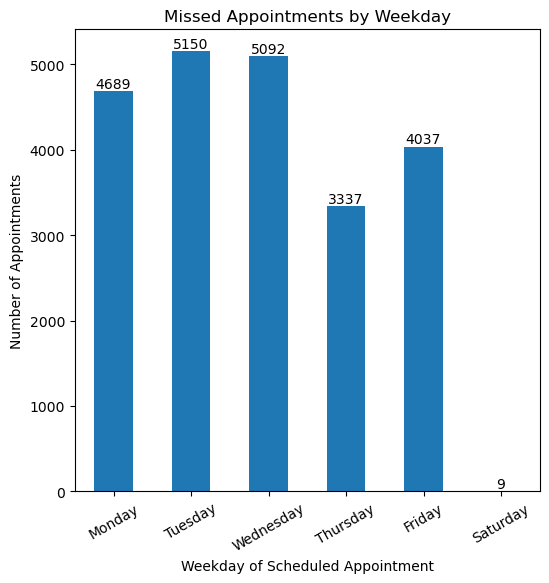

In [26]:
bar_m = df_day_missed_weekday.reindex(["Monday", "Tuesday", "Wednesday", 'Thursday', 'Friday', 'Saturday']).plot(kind="bar", figsize=(6, 6))
plt.title("Missed Appointments by Weekday")
plt.ylabel("Number of Appointments")
plt.xlabel("Weekday of Scheduled Appointment")
plt.xticks(rotation=30, horizontalalignment="center")
for container in bar_m.containers:
    bar_m.bar_label(container)
plt.show()

> <span style="color:grey"> As shown above, by numbers, Tuesday and Wednesday have the highest amount of missed appointments, both over 5000 each. </span>
***
> <span style="color:grey"> The bar chart titled <em>Attended Appointments by Weekday</em> is comparing the Total number of attended appointments by weekday.</span>

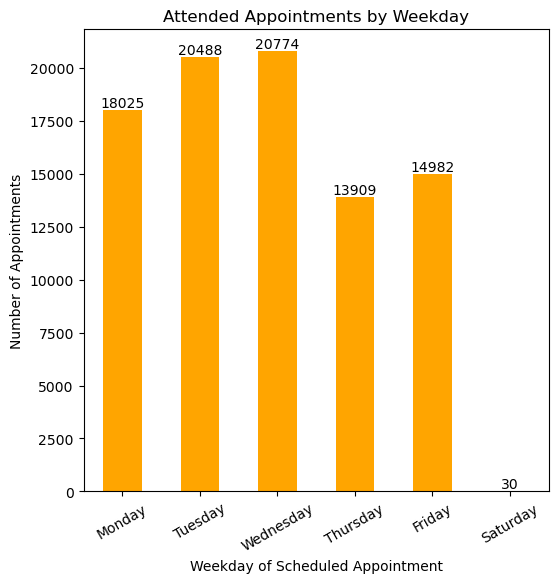

In [27]:
bar_a = df_day_attended_weekday.reindex(["Monday", "Tuesday", "Wednesday", 'Thursday', 'Friday', 'Saturday']).plot(kind="bar", color = 'orange', figsize=(6, 6))
plt.title("Attended Appointments by Weekday")
plt.ylabel("Number of Appointments")
plt.xlabel("Weekday of Scheduled Appointment")
plt.xticks(rotation=30, horizontalalignment="center")
for container in bar_a.containers:
    bar_a.bar_label(container)
plt.show()

> <span style="color:grey"> By numbers, most appointments are scheduled on Tuesday and Wednesday. </span>
***
> <span style="color:grey"> The Pie chart titled <em>Percent of All Appointment by Day</em> is looking at the percent to total of all booked appointments by day </span>

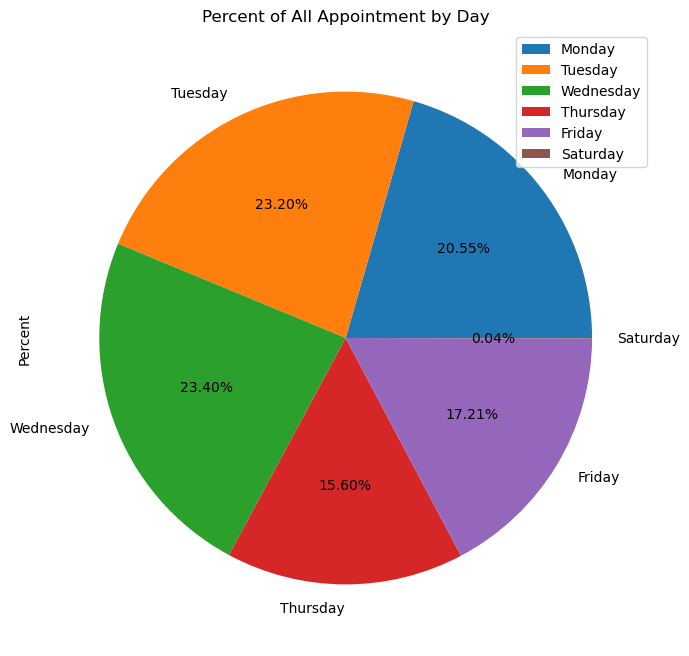

In [28]:
df_day_total_combined.reindex(["Monday", "Tuesday", "Wednesday", 'Thursday', 'Friday', 'Saturday']).plot.pie(subplots=True,autopct='%1.2f%%', figsize=(8, 8))
plt.title('Percent of All Appointment by Day')
plt.legend(loc = 'upper right')
plt.show()

> <span style="color:grey"> Like the previous bar chart, this pie chart shows that most appointments are scheduled on Tuesday and Wednesday, accounting for almost half of all appointments in a given week. </span>

***
> <span style="color:grey"> The bar chart titled <em>Percentage of Missed Appointments by Day</em> is comparing the percentage of missed appointments by weekday.</span>


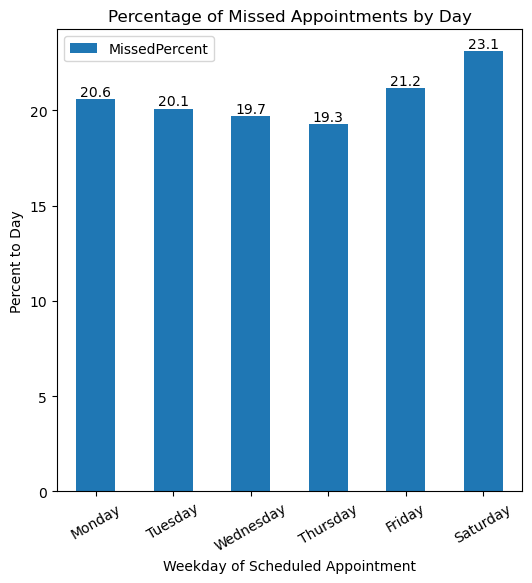

In [29]:
bar_m = df_day_total.plot.bar(x='Weekday', y='MissedPercent',figsize=(6, 6))
plt.title("Percentage of Missed Appointments by Day")
plt.ylabel("Percent to Day")
plt.xlabel("Weekday of Scheduled Appointment")
plt.xticks(rotation=30, horizontalalignment="center")
for container in bar_m.containers:
    bar_m.bar_label(container)
plt.show()

> <span style="color:grey"> As shown above, the day with the highest percentage of missed appointments to total scheduled appointments is Saturday at 23.1% </span>

<a id='conclusions'></a>
## <span style="color:CadetBlue "> Conclusions</span>
**<span style="color:grey"> Are Men or Women more likely to attend their scheduled appointment?</span>**
***
<span style="color:grey"> Although Women appear more likely to seek medical attention, the attendance rate between Men and Women with scheduled appointments is almost identical. We observed less than a 1% variance between the groups</span>
***
**<span style="color:grey"> Which day of the week is a scheduled appointment most likely to be missed?</span>**
***
 <span style="color:grey"> Based on the percentage of missed appointments compared to total appointments in a given day, Saturday and Fridays are the most likely day for someone to miss their appointment.</span>


**<span style="color:grey"> Limitations of the dataset</span>**
***
 <span style="color:grey">While analyzing the occurrence of a specific gender missing an appointment or which day is most likely for an appointment to be missed, this data set does not contain enough information to fully dig into why appointments are being missed in the first place. While we have ample records to analyze, this data set does not contain socioeconomic information such as employment status, transportation method, or home location that would have been interesting to dig into. These additional pieces of information could have helped better answer why certain appointments are missed.
    
We could make an unfounded assumption that the reason why Saturdays and Fridays are the most common days to miss an appointment is because of weekend plans but it is very likely that with additional socioeconomic data we could find a more compelling answer. With additional data, we may see that distance to the hospital is a limiting factor or that the patient has to rely on public transportation which could be unreliable.
</span>